In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import matplotlib.pyplot as plt
import heapq

In [2]:
# Get the button and input and output fields
service = Service(executable_path="chromedriver-win64/chromedriver.exe")
driver = webdriver.Chrome(service=service)
url = "https://pages.cs.wisc.edu/~yw/CS320F23THH1.html"
driver.get(url)
print("DONE")

DONE


In [3]:
# Get the links on the page given current distance g
def get_links(g):
    links = driver.find_elements("tag name", "a")
    pages = list(filter(lambda x : x.text == "Link", links))
    hrefs = []
    for i in range(len(pages)):
        span = driver.find_element("id", "h" + str(i + 1))
        h = float(span.text)
        hrefs.append((g + h, g, h, pages[i].get_attribute("href")))
    return hrefs

get_links(0)

[(3.0, 0, 3.0, 'https://pages.cs.wisc.edu/~yw/CS320F23THH2.html'),
 (3.0, 0, 3.0, 'https://pages.cs.wisc.edu/~yw/CS320F23THH3.html'),
 (3.0, 0, 3.0, 'https://pages.cs.wisc.edu/~yw/CS320F23THH4.html')]

In [4]:
# Check if there is an additional image on the page
def goal_check():
    image = driver.find_elements("tag name", "img")
    if len(image) == 2:
        image[0].screenshot("image_a.png")
        print(image[0].get_attribute("src"))
        plt.imshow(plt.imread("image_a.png"))
        return True
    return False

goal_check()

False

(0, 0, 0, 'https://pages.cs.wisc.edu/~yw/CS320F23THH1.html')
(4.0, 1, 3.0, 'https://pages.cs.wisc.edu/~yw/CS320F23THH2.html')
(4.0, 1, 3.0, 'https://pages.cs.wisc.edu/~yw/CS320F23THH3.html')
(4.0, 1, 3.0, 'https://pages.cs.wisc.edu/~yw/CS320F23THH4.html')
(4.0, 2, 2.0, 'https://pages.cs.wisc.edu/~yw/CS320F23THH10.html')
(4.0, 2, 2.0, 'https://pages.cs.wisc.edu/~yw/CS320F23THH5.html')
(4.0, 2, 2.0, 'https://pages.cs.wisc.edu/~yw/CS320F23THH7.html')
(4.0, 3, 1.0, 'https://pages.cs.wisc.edu/~yw/CS320F23THH11.html')
(4.0, 3, 1.0, 'https://pages.cs.wisc.edu/~yw/CS320F23THH15.html')
(4.0, 3, 1.0, 'https://pages.cs.wisc.edu/~yw/CS320F23THH22.html')
(4.0, 4, 0.0, 'https://pages.cs.wisc.edu/~yw/CS320F23THH23.html')
https://pages.cs.wisc.edu/~yw/CS320/amongus.png


'https://pages.cs.wisc.edu/~yw/CS320F23THH23.html'

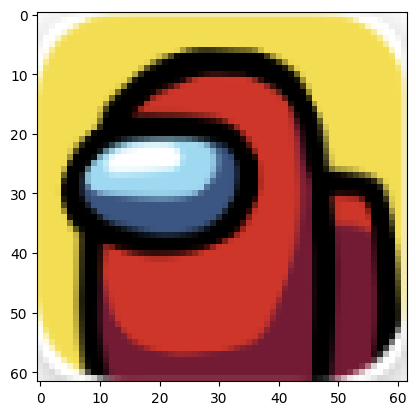

In [5]:
# A to find the goal page
def crawl(url):
    visited = set()
    queue = [(0, 0, 0, url)]
    found = False
    count = 0 # avoid infinite loop
    while count < 100:
        count = count + 1
        current = heapq.heappop(queue)
        if not current[3] in visited:
            visited.add(current[3])
            driver.get(current[3])
            print(current)
            found = goal_check()
            if found:
                return current[3]
            links = get_links(current[1] + 1)
            for link in links:
                if not link[3] in visited:
                    heapq.heappush(queue, link)
        if len(queue) == 0:
            break

url = "https://pages.cs.wisc.edu/~yw/CS320F23THH1.html"
crawl(url)

In [6]:
# Remember to quit when it's done
driver.quit()